<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

## 1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

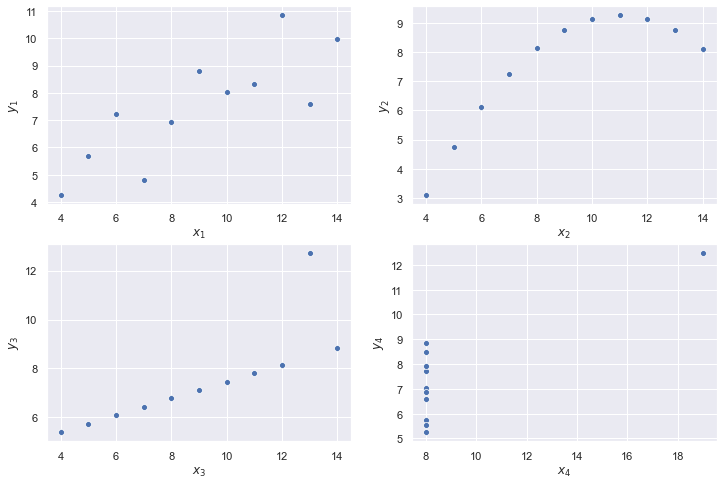

In [3]:
# tamano del grafico
fig = plt.figure(figsize=(12, 8)) # ventana

plt.subplot(2,2,1)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_1']) 
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')

plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2']) 
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_3']) 
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_4']) 
plt.xlabel('$x_4$')
plt.ylabel('$y_4$')

plt.show()

### Se observa de los graficos que las distribuciones de los datos de cada grupo son notoriamente diferentes 

## 2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [4]:
df.groupby(['grupo']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Notamos que aunque los graficos eran distintos, las estadisticas de los 4 grupos son sumamente parecidas, lo que hará que los ajustes lineales sean muy parecidos para cada grupo. Aun así, los valores de datos minimos, maximos y como se distribuyen los datos son claramente distintos.

## 3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [5]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Crecion de 4 modelos, uno para cada grupo:
#Modelo 1:
model_rl1 = LinearRegression() # Creando el modelo.
x1 = df[df['grupo'] == 'Grupo_1'][['x']]
y1 = df[df['grupo'] == 'Grupo_1']['y']
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

model_rl1.fit(X1_train,y1_train)

#Modelo 2:
model_rl2 = LinearRegression() # Creando el modelo.
x2 = df[df['grupo'] == 'Grupo_2'][['x']]
y2 = df[df['grupo'] == 'Grupo_2']['y']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

model_rl2.fit(X2_train,y2_train)

#Modelo 3:
model_rl3 = LinearRegression() # Creando el modelo.
x3 = df[df['grupo'] == 'Grupo_3'][['x']]
y3 = df[df['grupo'] == 'Grupo_3']['y']
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(X3_train,y3_train)

#Modelo 4:
model_rl4 = LinearRegression() # Creando el modelo.
x4 = df[df['grupo'] == 'Grupo_4'][['x']]
y4 = df[df['grupo'] == 'Grupo_4']['y']
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.33, random_state=42)

model_rl4.fit(X4_train,y4_train)


LinearRegression()

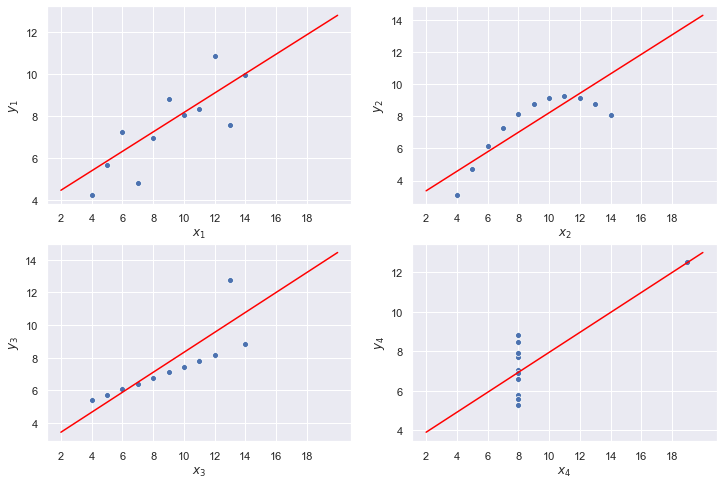

In [6]:
# Lista de coeficientes beta para cada modelo:
beta_1_0 = round(model_rl1.intercept_,4)
beta_1_1 = round(model_rl1.coef_[0],4)

beta_2_0 = round(model_rl2.intercept_,4)
beta_2_1 = round(model_rl2.coef_[0],4)

beta_3_0 = round(model_rl3.intercept_,4)
beta_3_1 = round(model_rl3.coef_[0],4)

beta_4_0 = round(model_rl4.intercept_,4)
beta_4_1 = round(model_rl4.coef_[0],4)

#Defincion de arreglos para fraficar cada ajuste:
x1_range = np.arange(2,21,1)
y1_range=[beta_1_0 + beta_1_1*n for n in x1_range]
y2_range=[beta_2_0 + beta_2_1*n for n in x1_range]
y3_range=[beta_3_0 + beta_3_1*n for n in x1_range]
y4_range=[beta_4_0 + beta_4_1*n for n in x1_range]

#Definición de dataFrames para graficar cada ajuste:
df_plot1 = pd.DataFrame({'x':x1_range,
                        'y':y1_range})
df_plot2 = pd.DataFrame({'x':x1_range,
                        'y':y2_range})
df_plot3 = pd.DataFrame({'x':x1_range,
                        'y':y3_range})
df_plot4 = pd.DataFrame({'x':x1_range,
                        'y':y4_range})

#Se grafica:
fig = plt.figure(figsize=(12, 8)) # ventana

#Grafico 1:
plt.subplot(2,2,1)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_1']) 
sns.lineplot(x='x', y='y', data=df_plot1,color="red")
plt.xlabel('$x_1$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_1$')

#Grafico 2:
plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2'])
sns.lineplot(x='x', y='y', data=df_plot2,color="red")
plt.xlabel('$x_2$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_2$')

#Grafico 3:
plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_3'])
sns.lineplot(x='x', y='y', data=df_plot3,color="red")
plt.xlabel('$x_3$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_3$')

#Grafico 4:
plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_4'])
sns.lineplot(x='x', y='y', data=df_plot4,color="red")
plt.xlabel('$x_4$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_4$')

plt.show()

Se observa que aunque la distribucion de los datos de cada grupo es claramente distinta, los ajustes lineales de los 4 grupos resultaron practicamente iguales.

## 4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [7]:
from metrics_regression import *
from sklearn.metrics import r2_score

#Metricas del grupo 1:
df_temp = pd.DataFrame({
        'y':y1_test,
        'yhat': model_rl1.predict(X1_test)
        })

df_metrics= summary_metrics(df_temp) #Se crea el dataframe de metricas ahora solo con el grupo 1
df_metrics['r2'] =  round(r2_score(y1_test, model_rl1.predict(X1_test)),4)

#Metricas del grupo 2:
df_temp = pd.DataFrame({
        'y':y2_test,
        'yhat': model_rl2.predict(X2_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y2_test, model_rl2.predict(X2_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 2 al ya existente 

#Metricas del grupo 3:
df_temp = pd.DataFrame({
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y3_test, model_rl3.predict(X3_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 3 al ya existente 

#Metricas del grupo 4:
df_temp = pd.DataFrame({
        'y':y4_test,
        'yhat': model_rl4.predict(X4_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y4_test, model_rl4.predict(X4_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 4 al ya existente 

grupos = pd.Series(['Grupo_1','Grupo_2','Grupo_3', 'Grupo_4']) #Se cambia el indice para mostrar cada grupo
df_metrics.set_index(keys=grupos)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.5907,0.9878,0.9939,0.1165,0.1113,0.0829,0.0971,0.0990,0.7572
0,1.1934,2.0670,1.4377,0.1569,0.1541,0.1633,0.1381,0.1484,0.2186
0,0.8342,1.1773,1.0850,0.1067,0.1057,0.1173,0.0943,0.1005,0.1432
0,0.3700,0.2736,0.5230,0.0496,0.0495,0.0521,0.0437,0.0514,-0.1234


<u> Grupo:1 </u> Notamos que los errores se notan normales y no muy alejados del 0. El factor $r^2$ en este caso no está muy cercano al 0. Así, en mi opinión el ajuste correspondiente al grupo 1 es correcto.

<u> Grupo:2 </u> Notamos que los errores absolutos son mayores a los del grupo 1, aunque los porcentuales no son muy diferentes. Lo que se destaca es que el factor $r^2$ es mucho menor que el del grupo 1 y además se encuentra cercno al 0, lo que se puede interpretar como que el ajuste lineal de los datos de este grupo no está bien hecho.

<u> Grupo:3 </u> Al igual que en 2 los errores absolutos son mayores que en 1 y los porcentuales son cercanos 0. En este caso el factor $r^2$ es aun más bajo que en 2, el ajuste está aun más mal hecho.

<u> Grupo:4 </u> Para este grupo los errores absolutos no son muy malos al igual que los porcentuales, pero el factor $r^2$ resultó negativo, lo que indica que la regresión lineal está completamente mal hecha, el ajuste no representa para nada la distribución de los datos.

## 5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario. 

## <u> Grupo 1: </u>

Para este grupo de datos podemos ver visualmente que el ajuste parece ser bueno. Al analizar las metricas para este grupo también se observa que el factor $r^2$ por ejemplo tiene un valor de aprox 0,7 y los errores porcentuales también no estan muy alejados del 0. Así, a mi opinión, el ajuste parece ser correcto para este grupo.

## <u> Grupo 2: </u>

Observando el gráfico de este grupo se puede notar claramente que la distribución de los datos no es lineal. Por esto, propongo una regresión polinomica para aproximar los datos de mejor manera:

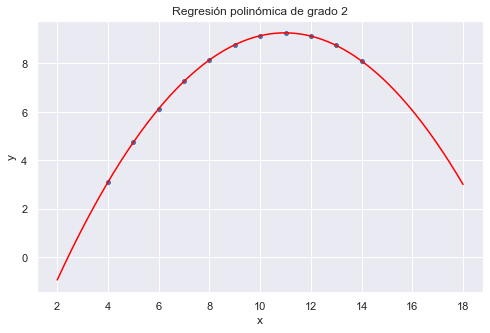

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=2 #grado del polinomio de regresion
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression()) #Creacion del modelo 
polyreg.fit(X2_train,y2_train) #Se usan los datos train creados en Pregunta 3

#Definiciones para graficar el ajuste
X_seq = np.linspace(2,18,300).reshape(-1,1)

#Se grafica:
plt.figure(figsize=(8,5))
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2']) 
plt.plot(X_seq,polyreg.predict(X_seq),color="red")
plt.title("Regresión polinómica de grado "+str(degree))
plt.show()

In [9]:
#Se presentan las nuevas metricas con el ajuste cuadrático
df_temp = pd.DataFrame({
        'y':y2_test,
        'yhat': polyreg.predict(X2_test)
        })

df_metrica2 = summary_metrics(df_temp)
df_metrica2['r2'] =  round(r2_score(y2_test, polyreg.predict(X2_test)),4)
df_metrica2.set_index(pd.Series({'Grupo_2':'Grupo_2'}))

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
Grupo_2,0.0013,0.0,0.0015,0.0002,0.0002,0.0002,0.0002,0.0002,1.0


Se observa que con el nuevo ajuste, las metricas resultaron perfectas, resulataba ser que la distribucion de los datos correspondia a una función cuadratica.

## <u> Grupo 3: </u>

Observando el comportamiento del ajuste lineal de este grupo se puede notar que hay un outlier que hace que la pendiente del ajuste lineal se aleje de la distribución de los datos del Grupo_3. Con esto, propondgo una estrategia de eliminar el dato anómalo y hacer el ajuste con el resto de datos bien distribuidos:

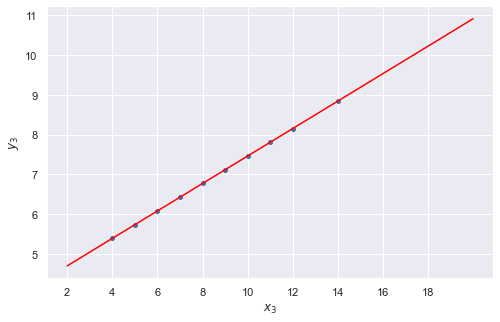

In [10]:
#Se elimina el dato anómalo:
df_nuevo = df[df['grupo'] == 'Grupo_3'].drop(24)

#Se crea un nuevo ajuste ahora para los datos sin el outlier:
model_rl3 = LinearRegression()
x3 = df_nuevo[['x']]
y3 = df_nuevo['y']
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(X3_train,y3_train)

#Definición de los coef del ajuste
beta_3_0 = round(model_rl3.intercept_,4)
beta_3_1 = round(model_rl3.coef_[0],4)

#Definciones para Graficar el ajuste:
x_range = np.arange(2,21,1)
y3_range=[beta_3_0 + beta_3_1*n for n in x_range]

df_plot3 = pd.DataFrame({'x':x_range,
                        'y':y3_range})

#Grafico con el ajuste y los datos de df_nuevo:
fig = plt.figure(figsize=(8, 5)) # ventana

sns.scatterplot(x='x', y='y', data=df_nuevo) #Datos originales sin el outlier
sns.lineplot(x='x', y='y', data=df_plot3,color="red") #Ajuste lineal
plt.xlabel('$x_3$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_3$')
plt.show()

In [11]:
#Se presentan las nuevas metricas con los datos actualizados quitando el outlier

df_temp = pd.DataFrame({
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        })
df_metrica3= summary_metrics(df_temp)
df_metrica3['r2'] =  round(r2_score(y3_test, model_rl3.predict(X3_test)),4)
df_metrica3.set_index(pd.Series({'Grupo_3':'Grupo_3'}))

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
Grupo_3,0.0018,0.0,0.0021,0.0003,0.0003,0.0003,0.0002,0.0003,1.0


Se observa que al quitar el oulier, el ajuste resulta sumamente bueno visualmente y además contiene errores muy cercanos a 0 y un factor $r^2=1$.

## <u> Grupo 4: </u>

Para este grupo de datos se observa en el grafico que existe una distribucion de datos muy particular, hay un outlier y todos los demás datos se encuentran concentrados en una linea vertical correspondiente a $x=8$. Así, propongo el eliminar el outlier y realizar un ajuste intercambiando los ejes (para obtener un ajuste de pendiente 0 y no $\infty$):

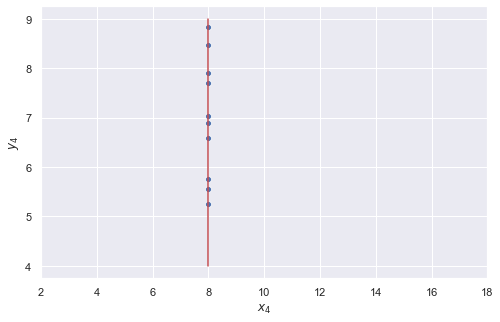

In [12]:
#Definicion del dataframe sin el outlier
df_nuevo4 = df[df['grupo'] == 'Grupo_4'].drop(40)

#Defincion del nuevo modelo
model_rl4_nuevo = LinearRegression() # Creando el modelo.
x4 = df_nuevo4['x']
y4 = df_nuevo4[['y']]
X4_train, X4_test, y4_train, y4_test = train_test_split(y4, x4, test_size=0.33, random_state=42)

model_rl4_nuevo.fit(X4_train,y4_train)

#Definición de los coef del nuevo ajuste:
beta_4_0_nuevo = round(model_rl4_nuevo.intercept_,4)
beta_4_1_nuevo = round(model_rl4_nuevo.coef_[0],4)

#Definiciones para graficar el ajuste
x_range = np.arange(4,10,1)
y4_range=[beta_4_0_nuevo + beta_4_1_nuevo*n for n in x_range]

df_plot4_nuevo = pd.DataFrame({'x':x_range,
                        'y':y4_range})

#Se grafica:
plt.figure(figsize=(8,5))

sns.scatterplot(x='x', y='y', data=df_nuevo4)
plt.plot(y4_range, x_range,'r')
plt.xlabel('$x_4$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_4$')
plt.show()

In [13]:
#Se presentan las nuevas metricas con los datos actualizados quitando el outlier
df_temp = pd.DataFrame(
    {
        'y':y4_test,
        'yhat': model_rl4_nuevo.predict(X4_test)
        }
)
df_metrica4 = summary_metrics(df_temp)
df_metrica4['r2'] =  round(r2_score(y4_test, model_rl4_nuevo.predict(X4_test)),4)
df_metrica4.set_index(pd.Series({'Grupo_4':'Grupo_4'}))
df_metrica4

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Se observa que con la estrategia proouesta, el ajuste lineal resulta perfecto para el Grupo_04